<a href="https://colab.research.google.com/github/maestroK/machine_learning/blob/main/Algorithmic_Trading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning in Trading

In [ ]:
pip install pandas numpy matplotlib statsmodels pandas_datareader datetime yfinance PyPortfolioOpt pandas_ta

In [ ]:
# importing packages

from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf
import pandas_ta
import warnings
warnings.filterwarnings('ignore')

sp500 = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies") [0]
sp500

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [ ]:
# data cleaning, replacing . with -

sp500['Symbol'] = sp500['Symbol'].str.replace('.','-')
sp500['Symbol']

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ACN
...,...
498,XYL
499,YUM
500,ZBRA
501,ZBH


In [ ]:
# removing copies and creating a list of the resulting object

symbols_list = sp500['Symbol'].unique().tolist()
symbols_list

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK-B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF-B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 

Ensure that both start_date and end_date are properly formatted strings before passing them to yf.download().



In [ ]:
end_date = '2023-09-27'
start_date = (pd.to_datetime(end_date) - pd.DateOffset(years=8)).strftime('%Y-%m-%d')  # Convert to string

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date)

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['SW', 'VLTO', 'SOLV', 'GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-09-27 -> 2023-09-27) (Yahoo error = "Data doesn\'t exist for startDate = 1443326400, endDate = 1695787200")')


In [ ]:
df

Price        Adj Close                                      ...   Volume                          
Ticker               A        AAPL        ABBV        ABNB  ...      YUM      ZBH    ZBRA      ZTS
Date                                                        ...                                   
2015-09-28   30.973970   25.357845   35.522694         NaN  ...  5661787  2343250  947600  8954900
2015-09-29   31.317402   24.595570   35.718918         NaN  ...  6018857  2358906  895000  7328400
2015-09-30   31.865032   24.875223   36.815056         NaN  ...  7378142  2012723  618800  4954100
2015-10-01   31.317402   24.712849   37.302216         NaN  ...  4426718  1604019  464900  4131800
2015-10-02   32.180618   24.893265   37.769093         NaN  ...  7719772  1353626  341500  4036800
...                ...         ...         ...         ...  ...      ...      ...     ...      ...
2023-09-20  111.282021  174.404709  146.724167  138.009995  ...  1437200  1055900  824900  1485500
2023-09-21  108.570969  172.854324  146.552231  132.750000  ...  1492700  1489200  676200  1691800
2023-09-22  110.233223  173.709030  145.893173  132.199997  ...  1534100  1267300  482200  1281800
2023-09-25  110.757614  174.991028  147.717529  134.139999  ...  1048500   886700  314500  1551100
2023-09-26  109.560410  170.896530  147.010712  132.279999  ...  1500600  3610500  355400  1463200

[2013 rows x 3018 columns]

In [ ]:
# creating stacks to accomodate the data
df.stack()

Price               Adj Close       Close        High         Low        Open       Volume
Date       Ticker                                                                         
2015-09-28 A        30.973970   33.369999   34.270000   33.320000   34.130001    2615400.0
           AAPL     25.357845   28.110001   28.642500   28.110001   28.462500  208436000.0
           ABBV     35.522694   52.500000   55.430000   52.340000   55.389999   15123000.0
           ABT      32.776592   39.060001   40.740002   39.000000   40.740002   17219300.0
           ACGL     22.992727   24.180000   24.243334   23.966667   24.056667    1946700.0
...                       ...         ...         ...         ...         ...          ...
2023-09-26 XYL      88.254005   89.519997   90.849998   89.500000   90.379997    1322400.0
           YUM     121.017845  124.010002  124.739998  123.449997  124.239998    1500600.0
           ZBH     111.037544  112.459999  117.110001  112.419998  116.769997    3610500.0
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001     355400.0
           ZTS     174.717117  176.869995  178.449997  176.270004  176.580002    1463200.0

[984947 rows x 6 columns]

In [ ]:
# we can also directly stack by add .stack() to end our yf downlaod

df = yf.download(tickers=symbols_list,
                 start=start_date,
                 end=end_date).stack()

df

[*********************100%***********************]  503 of 503 completed
ERROR:yfinance:
4 Failed downloads:
ERROR:yfinance:['SW', 'VLTO', 'SOLV', 'GEV']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2015-09-27 -> 2023-09-27) (Yahoo error = "Data doesn\'t exist for startDate = 1443326400, endDate = 1695787200")')


Price               Adj Close       Close        High         Low        Open       Volume
Date       Ticker                                                                         
2015-09-28 A        30.973957   33.369999   34.270000   33.320000   34.130001    2615400.0
           AAPL     25.357840   28.110001   28.642500   28.110001   28.462500  208436000.0
           ABBV     35.522709   52.500000   55.430000   52.340000   55.389999   15123000.0
           ABT      32.776604   39.060001   40.740002   39.000000   40.740002   17219300.0
           ACGL     22.992727   24.180000   24.243334   23.966667   24.056667    1946700.0
...                       ...         ...         ...         ...         ...          ...
2023-09-26 XYL      88.254005   89.519997   90.849998   89.500000   90.379997    1322400.0
           YUM     121.017853  124.010002  124.739998  123.449997  124.239998    1500600.0
           ZBH     111.037544  112.459999  117.110001  112.419998  116.769997    3610500.0
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001     355400.0
           ZTS     174.717102  176.869995  178.449997  176.270004  176.580002    1463200.0

[984947 rows x 6 columns]

In [ ]:
# changing index names

df.index.names = ['date', 'ticker']

# lowercasing columns
df.columns = df.columns.str.lower()
df

Price               adj close       close        high         low        open       volume
date       ticker                                                                         
2015-09-28 A        30.973957   33.369999   34.270000   33.320000   34.130001    2615400.0
           AAPL     25.357840   28.110001   28.642500   28.110001   28.462500  208436000.0
           ABBV     35.522709   52.500000   55.430000   52.340000   55.389999   15123000.0
           ABT      32.776604   39.060001   40.740002   39.000000   40.740002   17219300.0
           ACGL     22.992727   24.180000   24.243334   23.966667   24.056667    1946700.0
...                       ...         ...         ...         ...         ...          ...
2023-09-26 XYL      88.254005   89.519997   90.849998   89.500000   90.379997    1322400.0
           YUM     121.017853  124.010002  124.739998  123.449997  124.239998    1500600.0
           ZBH     111.037544  112.459999  117.110001  112.419998  116.769997    3610500.0
           ZBRA    223.960007  223.960007  226.649994  222.580002  225.970001     355400.0
           ZTS     174.717102  176.869995  178.449997  176.270004  176.580002    1463200.0

[984947 rows x 6 columns]

## Calculate features and technical indicators for each stock

We will use the following ones:

1. Garman-Klass Volatility
2. RSI
3. Bollinger Bands
4. ATR
5. Moving Average Convergence Divergence(MACD)
6. Dollar Volume


### Garman-Klass Volatility:

Garman-Klass volatility is a method of estimating the volatility of an asset's price using high frequency data. Specifically, it takes in the high, low, open and close prices of an asset within a time period.

It is generallly considered more relaibale measure of volatility than traditional techniques like standard devaition as it uses price range data to better account for market variations and microstructure noise.


The German Klass volatility estimate is computed using the following formula:

$
\sigma^2 = \frac{1}{2n} \sum_{i=1}^{n} \ln^2\left(\frac{H_i}{L_i}\right) - \left[2\ln(2) - \frac{1}{n} \sum_{i=1}^{n} \ln^2\left(\frac{C_i}{O_i}\right)\right]
$

#### Where:
- $H_i$: High price for day $i$
- $L_i$: Low price for day $i$
- $C_i$: Close price for day $i$
- $O_i$: Open price for day $i$
- $n$: Number of periods

---

#### Explanation of the Components

1. **First Term**:
   $
   \frac{1}{2n} \sum_{i=1}^{n} \ln^2\left(\frac{H_i}{L_i}\right)
   $
   - Measures the logarithmic price range between the high and low prices, reflecting intraday price movement.

2. **Second Term**:
   $
   \left[2\ln(2) - \frac{1}{n} \sum_{i=1}^{n} \ln^2\left(\frac{C_i}{O_i}\right)\right]
   $
   - Adjusts for the contribution of the opening-to-closing price movement.

---

#### Final Calculation

- The difference between these terms produces a refined estimate of the variance ($\sigma^2$) that is less biased by extreme outliers.
- To get the volatility ($\sigma$), take the square root of the variance:
  $
  \sigma = \sqrt{\sigma^2}
  $

#### Example

In [ ]:
#this is an example of calculating the GK Volatility, incorporated only as an example

def german_klass_volatility(high, low, open_, close):
    n = len(high)
    term1 = (1 / (2 * n)) * np.sum(np.log(high / low) ** 2)
    term2 = ((2 * np.log(2) - 1) / n) * np.sum(np.log(close / open_) ** 2)
    variance = term1 - term2
    return np.sqrt(variance)

# Example data
ex_data = {
    'High': [120, 125, 130],
    'Low': [115, 120, 125],
    'Open': [118, 122, 128],
    'Close': [119, 124, 129]
}
ex_df = pd.DataFrame(ex_data)

volatility = german_klass_volatility(ex_df['High'], ex_df['Low'], ex_df['Open'], ex_df['Close'])
print("German Klass Volatility:", volatility)


German Klass Volatility: 0.028017659831727836


### RSI (Relative Strength Index)

The RSI is a momentum oscillator that measures the speeed and change of price movements. It can be used to identify overbought or oversold stocks.

Overbought or oversold refer to assets that are trading at either too high above or below their normal prices.

The RSI is calculated as:

$$RSI = 100 - \frac{100}{1+RS}$$

Where RS (relative strength):

$$RS = \frac{Average Gain}{Average Loss}$$

#### Interpretation:

An RSI of greater than 70 suggests the asset is overbought, a 40 suggests oversold while and RSI in the range of 50 indicates no clear trends.

### Bollinger Bands:

Bollinger Bands is technical analysis tool that you can google(i sugest watching a video explanation for better understanding).

They are another measure of volatility that we can use together with Garman-Klass volatility.


**Purpose of Using groupby**

The groupby ensures that the RSI is calculated separately for each group (e.g., each stock or category). Without this step, the calculation would treat all data as a single series, mixing the RSI calculation across groups, which is incorrect in multi-asset analyses.

**Practical Example**

If df contains data for multiple stocks, indexed by stock ticker (level=1), this code calculates the RSI for each stock's adjusted close prices individually over the past 20 days.

After execution, the df['rsi'] column will contain RSI values for each stock at each time point, allowing you to analyze momentum trends for each asset separately.

In [ ]:
# adding garmanklass vol column to the data
df['garman_klass_vol'] = ((np.log(df['high'])-np.log(df['low']))**2)/2-(2*np.log(2)-1)*((np.log(df['adj close'])-np.log(df['open']))**2)

# adding rsi column
df['rsi'] = df.groupby(level=1)['adj close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))

df


Price               adj close       close        high  ...       volume  garman_klass_vol        rsi
date       ticker                                      ...                                          
2015-09-28 A        30.973957   33.369999   34.270000  ...    2615400.0         -0.003242        NaN
           AAPL     25.357840   28.110001   28.642500  ...  208436000.0         -0.004977        NaN
           ABBV     35.522709   52.500000   55.430000  ...   15123000.0         -0.074585        NaN
           ABT      32.776604   39.060001   40.740002  ...   17219300.0         -0.017321        NaN
           ACGL     22.992727   24.180000   24.243334  ...    1946700.0         -0.000725        NaN
...                       ...         ...         ...  ...          ...               ...        ...
2023-09-26 XYL      88.254005   89.519997   90.849998  ...    1322400.0         -0.000107  26.146729
           YUM     121.017853  124.010002  124.739998  ...    1500600.0         -0.000213  36.057230
           ZBH     111.037544  112.459999  117.110001  ...    3610500.0         -0.000144  31.893198
           ZBRA    223.960007  223.960007  226.649994  ...     355400.0          0.000133  29.494977
           ZTS     174.717102  176.869995  178.449997  ...    1463200.0          0.000032  42.623443

[984947 rows x 8 columns]

<Axes: xlabel='date'>

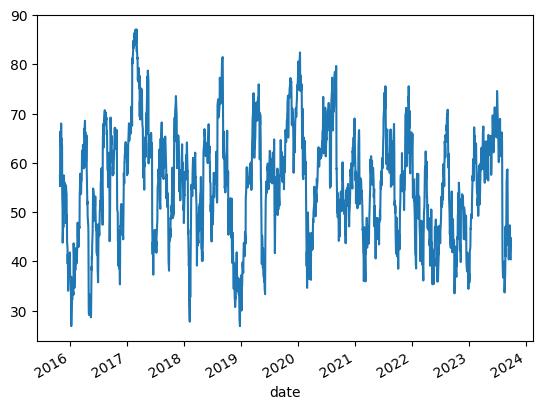

In [ ]:
# checking if rsi is coded correctly

df.xs('AAPL', level=1)['rsi'].plot()